In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.metrics import r2_score 
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder

In [2]:
np.__version__

'2.3.2'

In [2]:
bike_df=pd.read_csv(r"C:\Users\BAPS\Desktop\Python\Datasets\SeoulBikeData.csv")
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0  01/12/2017                254     0            -5.2           37   
1  01/12/2017                204     1            -5.5           38   
2  01/12/2017                173     2            -6.0           39   
3  01/12/2017                107     3            -6.2           40   
4  01/12/2017                 78     4            -6.0           36   

   Wind speed (m/s)  Visibility (m)  Dew point temperature(C)  \
0               2.2            2000                     -17.6   
1               0.8            2000                     -17.6   
2               1.0            2000                     -17.7   
3               0.9            2000                     -17.6   
4               2.3            2000                     -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [3]:
bike_df.info()
# OBSERVATION -> There are 14 columns in dataset and 8760 records
# Columns ['Date', 'Seasons', 'Holiday', 'Functioning Day'] are object datatypes rest all are numeric 
# There are no null values present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (m)            8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [4]:
bike_df.select_dtypes(include=['object']).columns

Index(['Date', 'Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [5]:
total_missing = bike_df.isnull().sum()
percentage_missing = total_missing * 100 / len(bike_df)
missing_value_df = pd.DataFrame(data=[total_missing, percentage_missing], index=["Total", "%"]).T
missing_value_df

Total    %
Date                        0.0  0.0
Rented Bike Count           0.0  0.0
Hour                        0.0  0.0
Temperature(C)              0.0  0.0
Humidity(%)                 0.0  0.0
Wind speed (m/s)            0.0  0.0
Visibility (m)              0.0  0.0
Dew point temperature(C)    0.0  0.0
Solar Radiation (MJ/m2)     0.0  0.0
Rainfall(mm)                0.0  0.0
Snowfall (cm)               0.0  0.0
Seasons                     0.0  0.0
Holiday                     0.0  0.0
Functioning Day             0.0  0.0

In [6]:
bike_df_o=bike_df  #creating an copy of original to preserve it

# Univariante Analysis

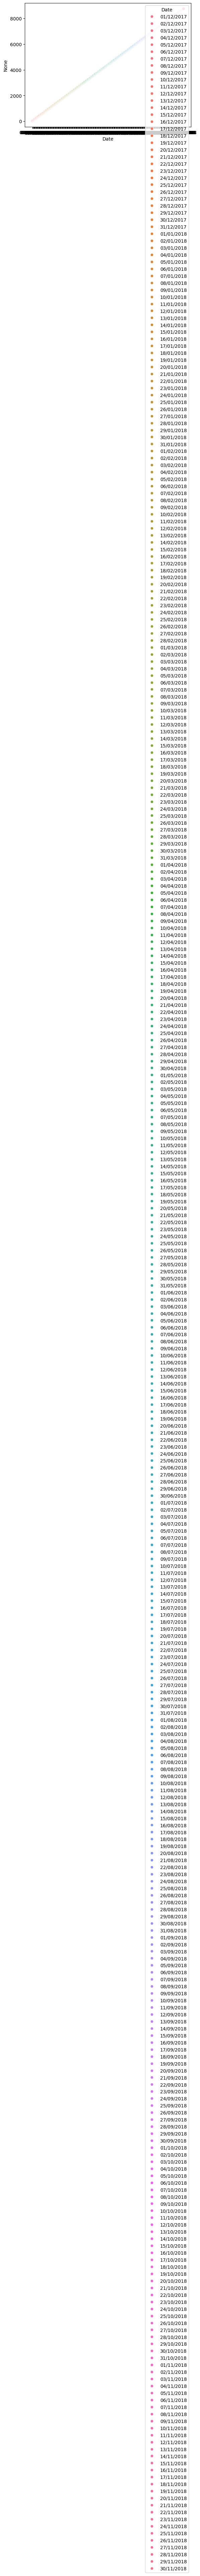

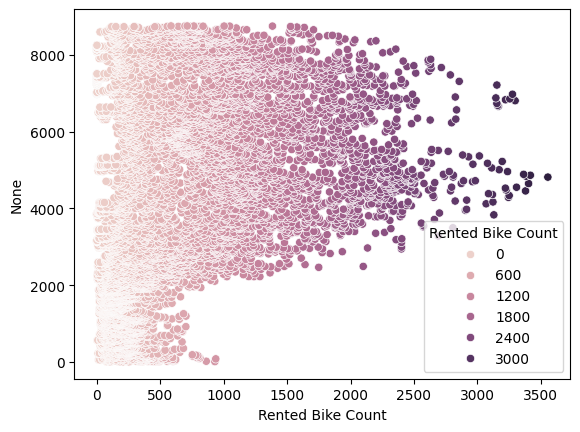

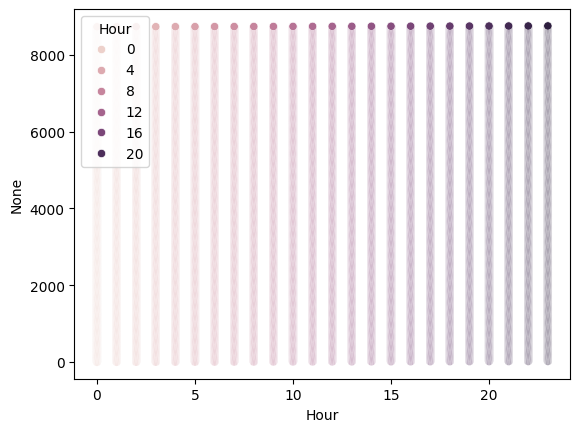

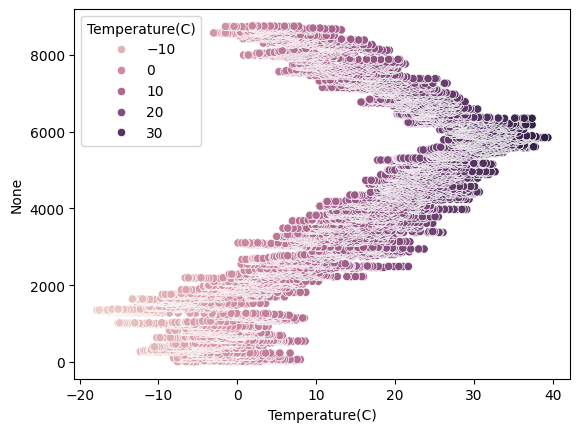

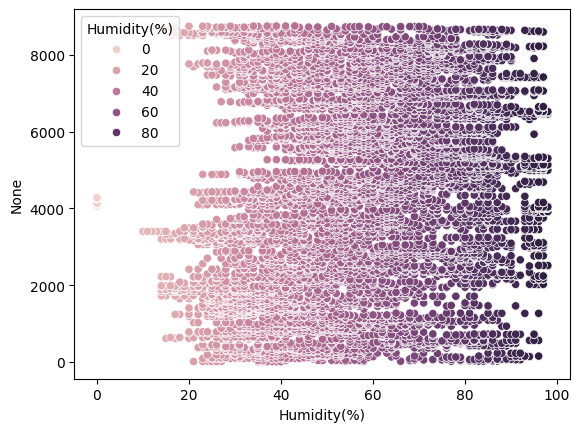

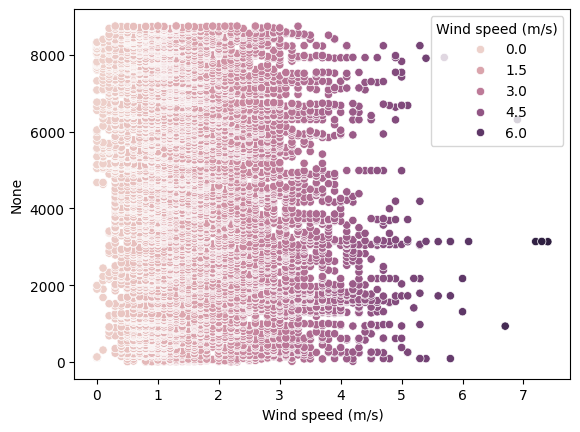

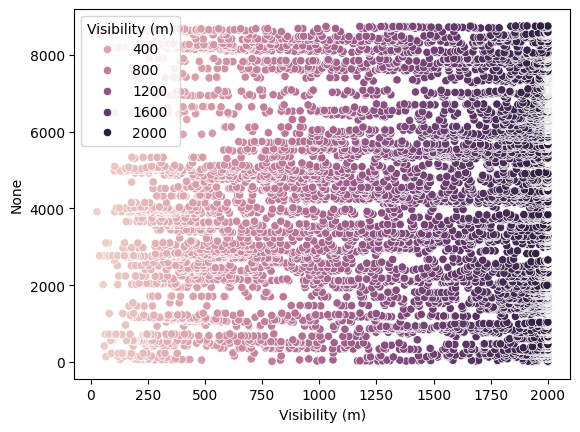

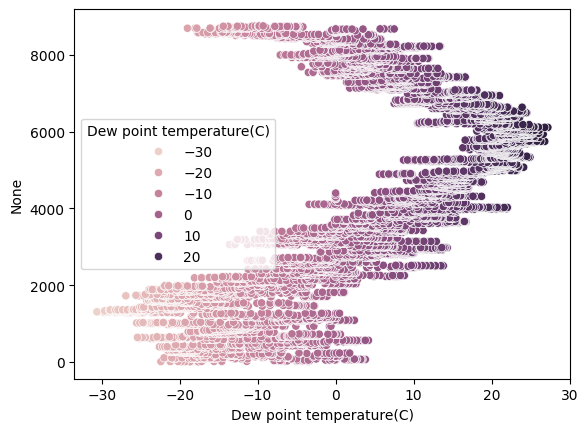

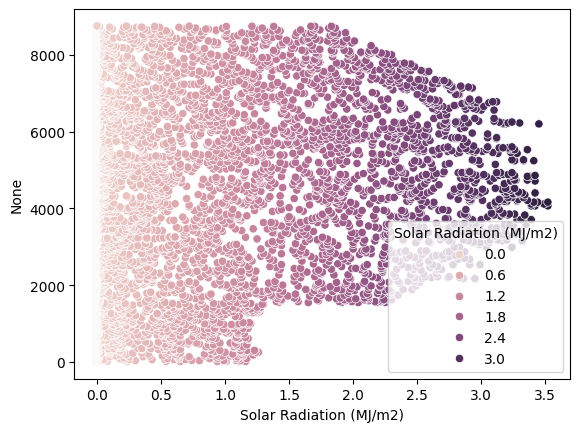

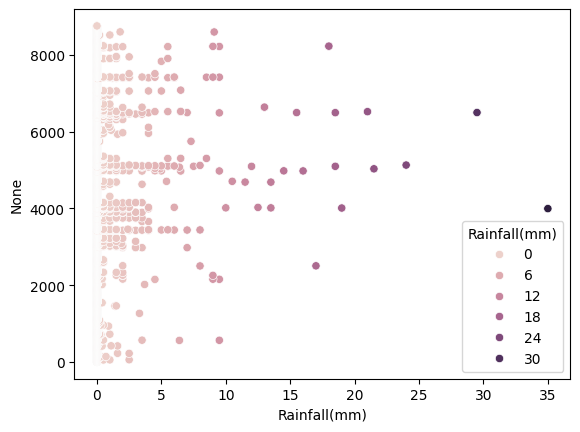

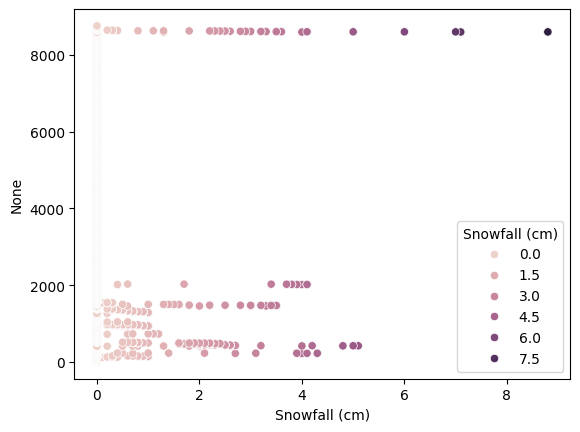

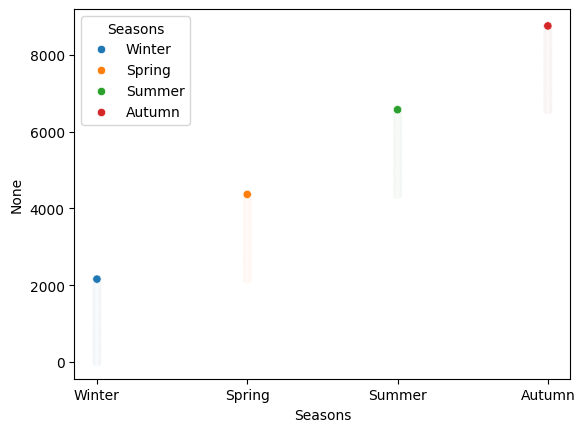

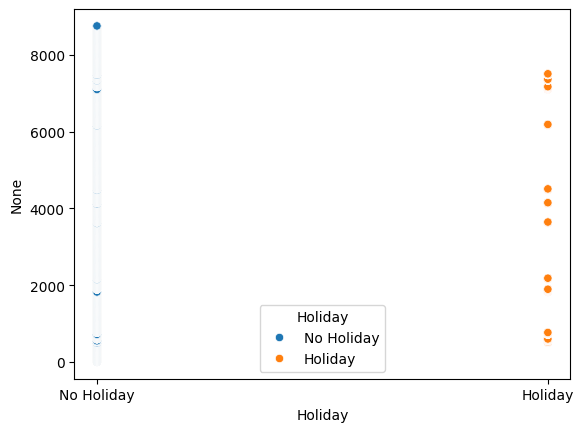

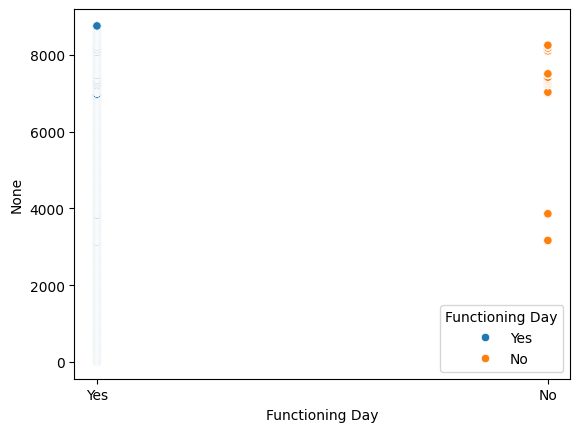

In [7]:
for col in bike_df.columns:
    plt.figure()
    sns.scatterplot(x=bike_df[col],data=bike_df,y=bike_df.index,hue=col)

In [7]:
encoder=LabelEncoder()

In [8]:
bike_df['Functioning Day']=encoder.fit_transform(bike_df['Functioning Day'])
bike_df['Holiday']=encoder.fit_transform(bike_df['Holiday'])
bike_df['Seasons']=encoder.fit_transform(bike_df["Seasons"])

In [9]:
bike_df

Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0     01/12/2017                254     0            -5.2           37   
1     01/12/2017                204     1            -5.5           38   
2     01/12/2017                173     2            -6.0           39   
3     01/12/2017                107     3            -6.2           40   
4     01/12/2017                 78     4            -6.0           36   
...          ...                ...   ...             ...          ...   
8755  30/11/2018               1003    19             4.2           34   
8756  30/11/2018                764    20             3.4           37   
8757  30/11/2018                694    21             2.6           39   
8758  30/11/2018                712    22             2.1           41   
8759  30/11/2018                584    23             1.9           43   

      Wind speed (m/s)  Visibility (m)  Dew point temperature(C)  \
0                  2.2            2000                     -17.6   
1                  0.8            2000                     -17.6   
2                  1.0            2000                     -17.7   
3                  0.9            2000                     -17.6   
4                  2.3            2000                     -18.6   
...                ...             ...                       ...   
8755               2.6            1894                     -10.3   
8756               2.3            2000                      -9.9   
8757               0.3            1968                      -9.9   
8758               1.0            1859                      -9.8   
8759               1.3            1909                      -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  \
0                         0.0           0.0            0.0        3        1   
1                         0.0           0.0            0.0        3        1   
2                         0.0           0.0            0.0        3        1   
3                         0.0           0.0            0.0        3        1   
4                         0.0           0.0            0.0        3        1   
...                       ...           ...            ...      ...      ...   
8755                      0.0           0.0            0.0        0        1   
8756                      0.0           0.0            0.0        0        1   
8757                      0.0           0.0            0.0        0        1   
8758                      0.0           0.0            0.0        0        1   
8759                      0.0           0.0            0.0        0        1   

      Functioning Day  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  
...               ...  
8755                1  
8756                1  
8757                1  
8758                1  
8759                1  

[8760 rows x 14 columns]

C:\Users\BAPS\AppData\Local\Temp\ipykernel_8332\4290298564.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

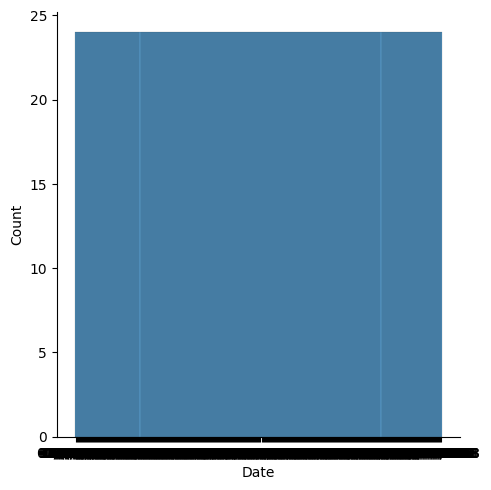

<Figure size 640x480 with 0 Axes>

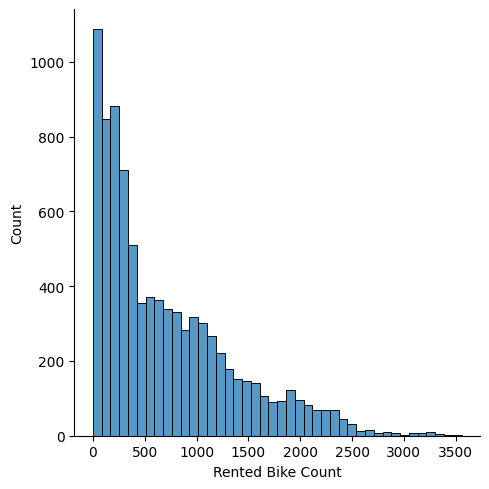

<Figure size 640x480 with 0 Axes>

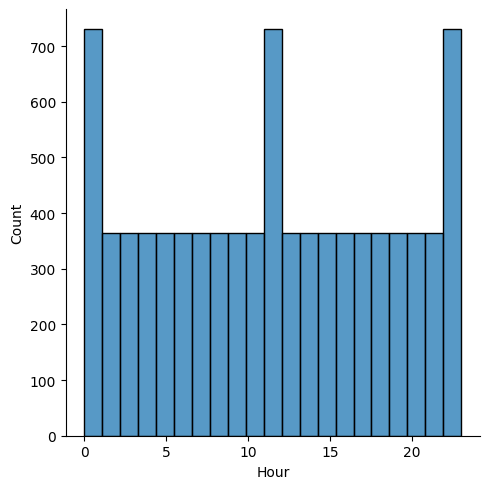

<Figure size 640x480 with 0 Axes>

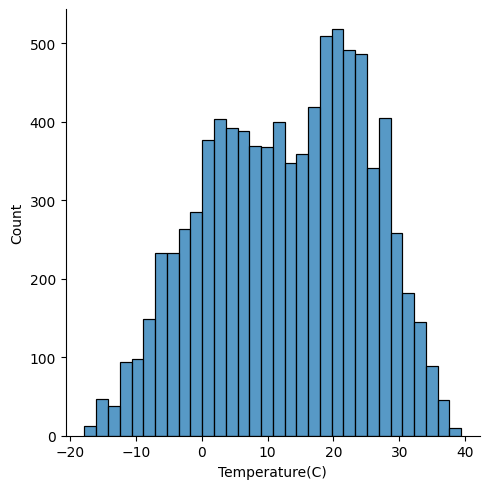

<Figure size 640x480 with 0 Axes>

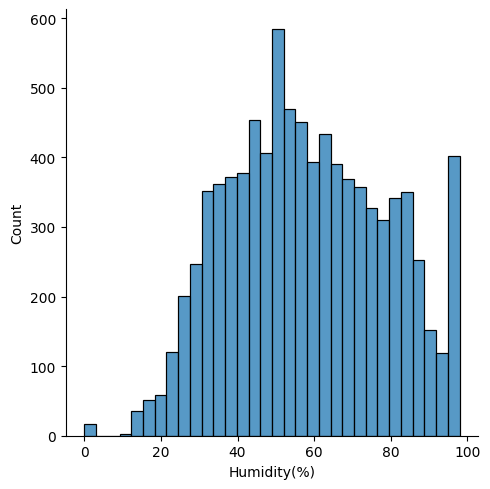

<Figure size 640x480 with 0 Axes>

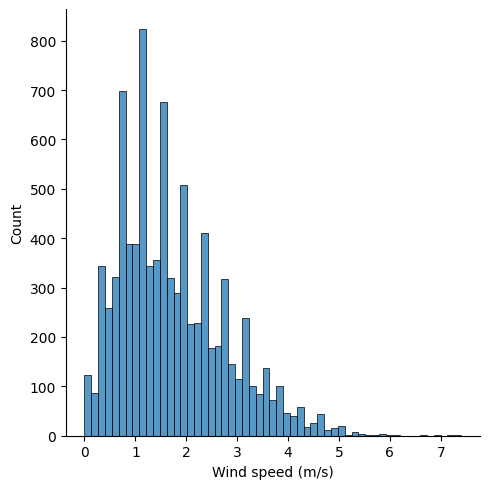

<Figure size 640x480 with 0 Axes>

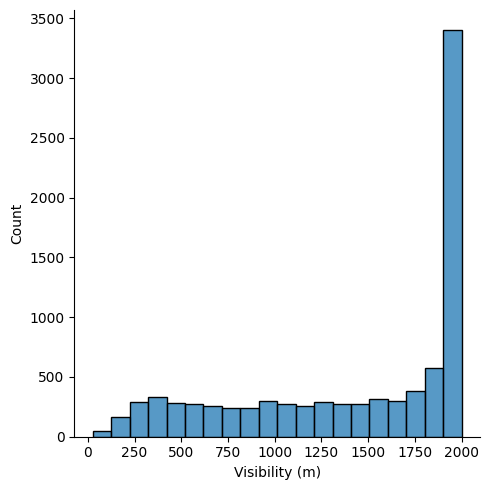

<Figure size 640x480 with 0 Axes>

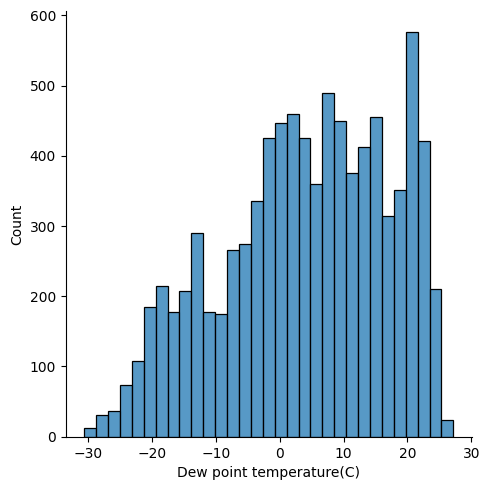

<Figure size 640x480 with 0 Axes>

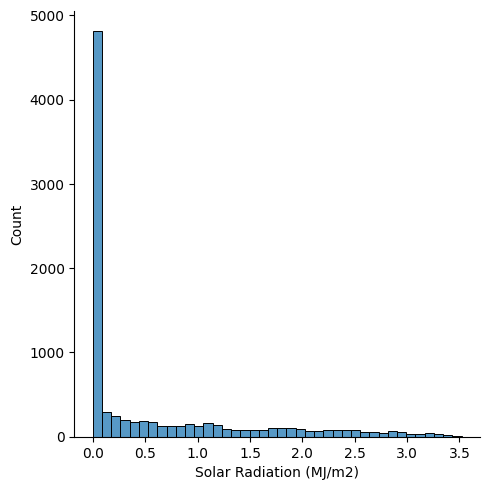

<Figure size 640x480 with 0 Axes>

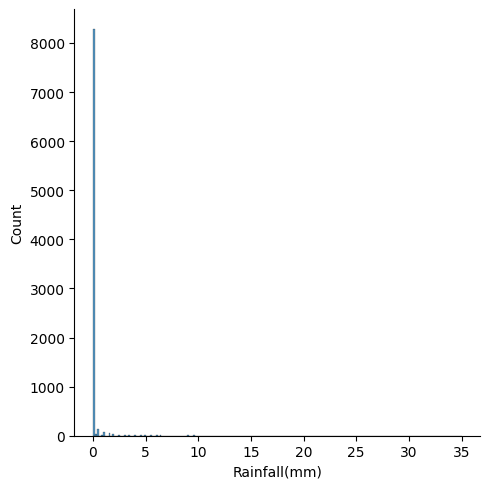

<Figure size 640x480 with 0 Axes>

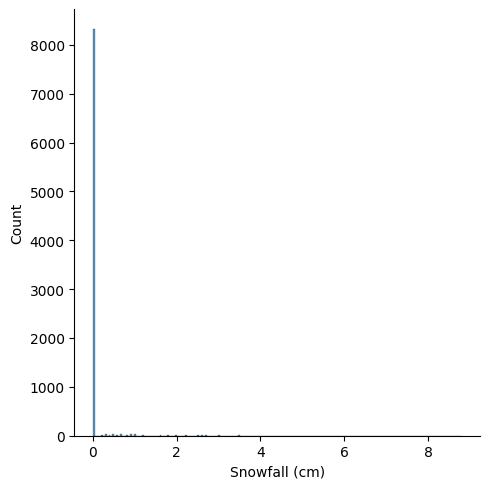

<Figure size 640x480 with 0 Axes>

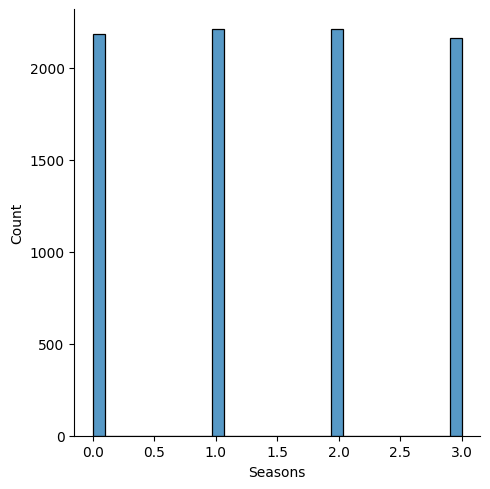

<Figure size 640x480 with 0 Axes>

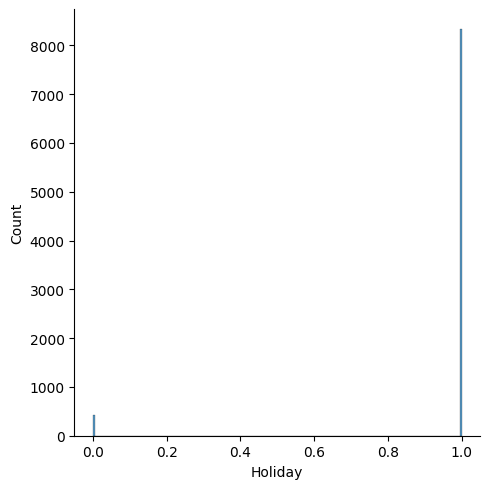

<Figure size 640x480 with 0 Axes>

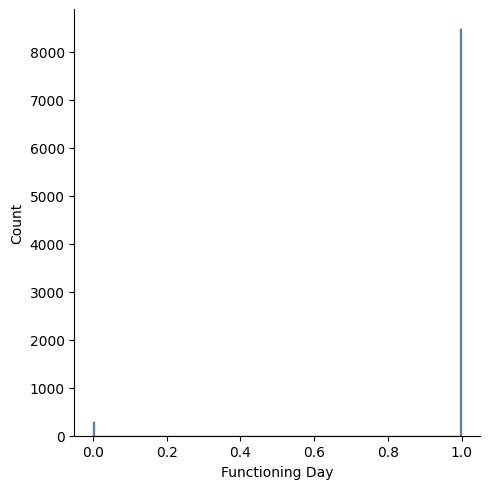

In [11]:
for col in bike_df.columns:
    plt.figure()
    sns.displot(x=bike_df[col],data=bike_df)

In [10]:
bike_df["Date"]=pd.to_datetime(bike_df["Date"],format="%d/%m/%Y")

In [11]:
bike_df["Month"]=bike_df['Date'].dt.month

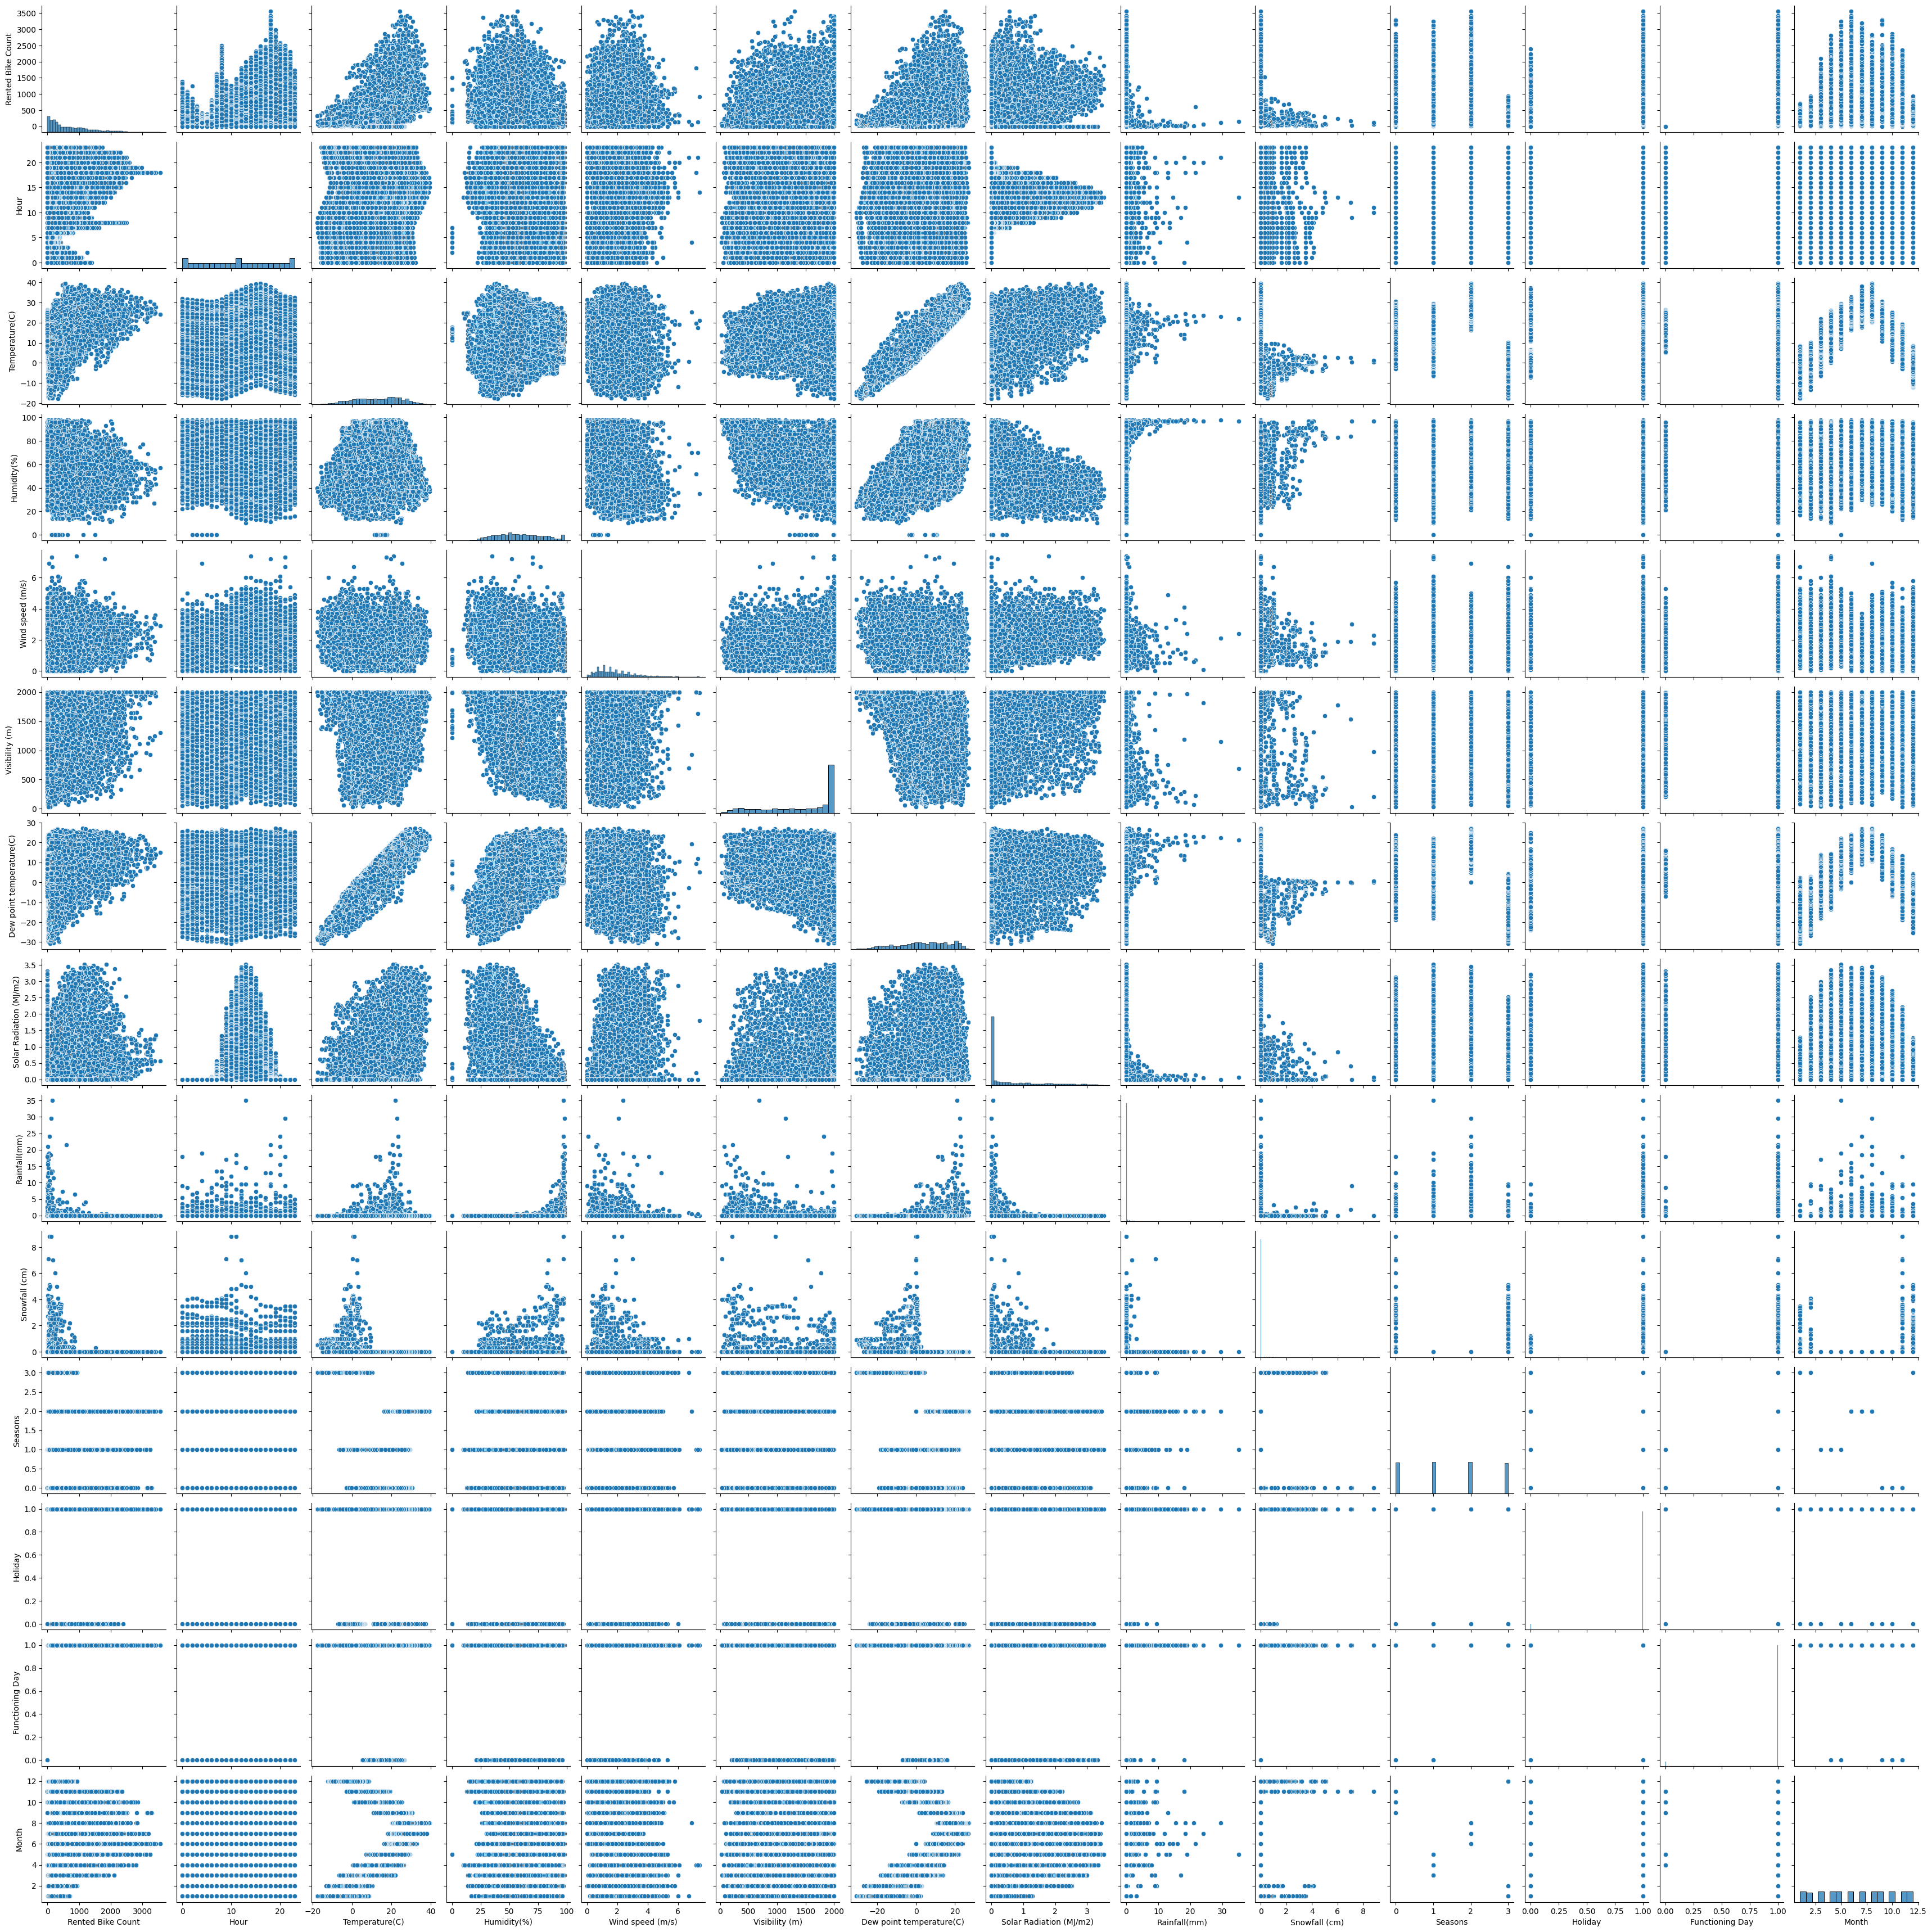

In [14]:
sns.pairplot(data=bike_df)

In [15]:
bike_df["Date"]=pd.to_datetime(bike_df["Date"],format="%d/%m/%Y")

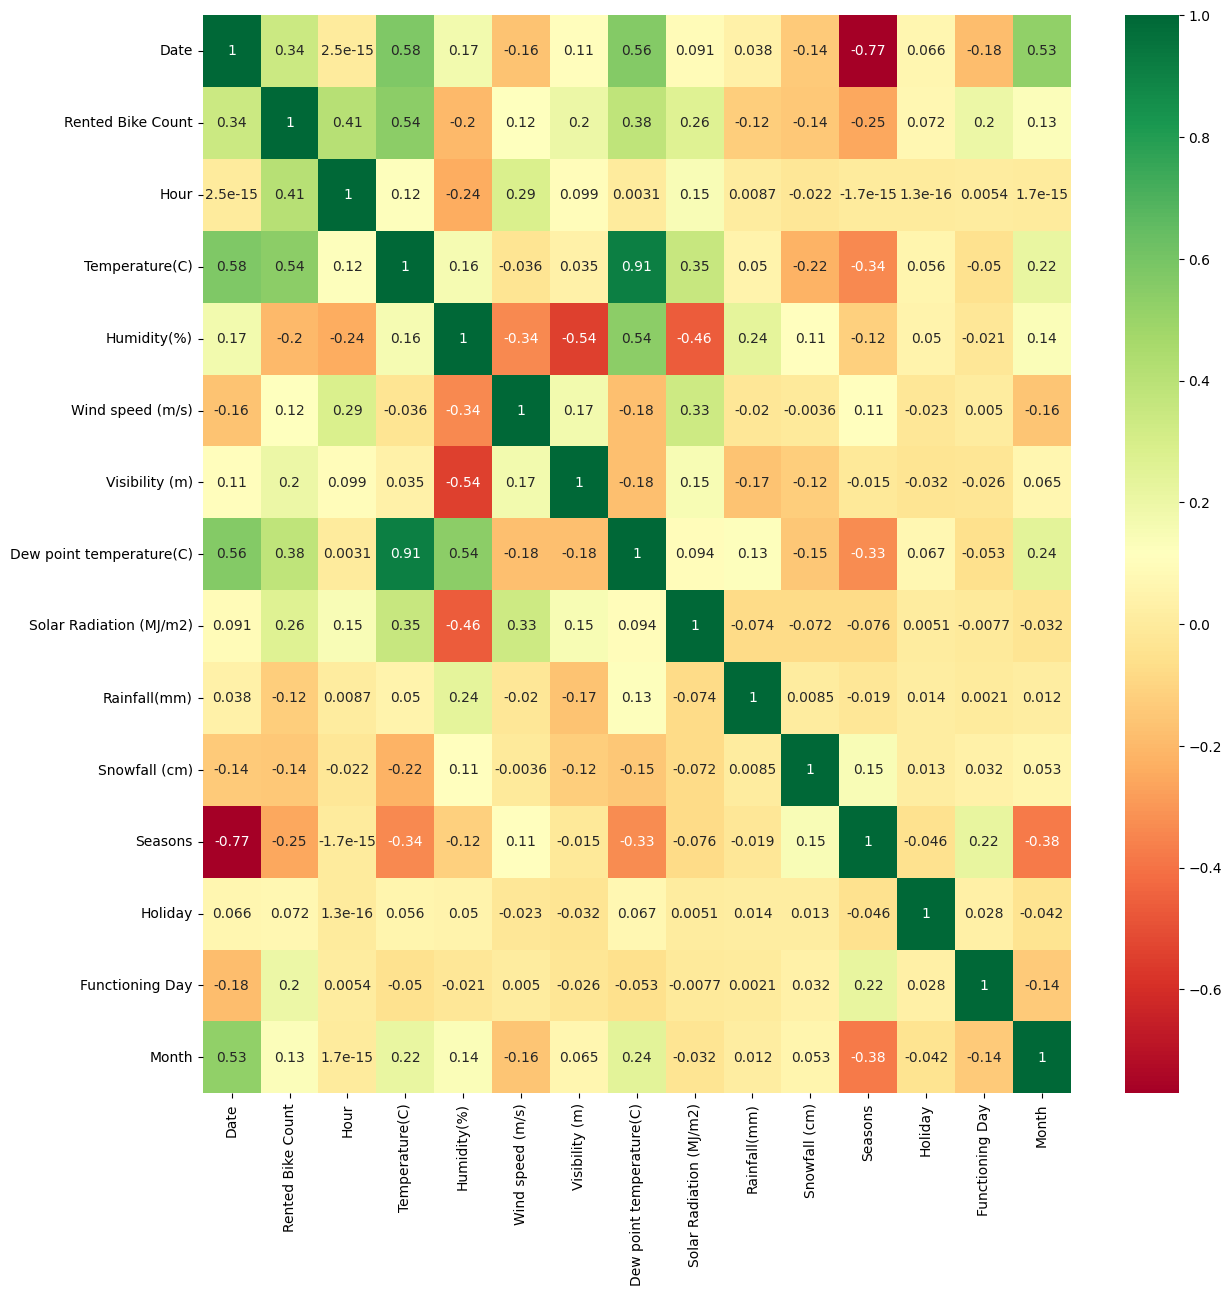

In [16]:
corr=bike_df.corr()
plt.subplots(figsize=(14,14))
sns.heatmap(corr,cmap='RdYlGn',annot=True)
plt.show()

In [12]:
bike_df=bike_df.drop(["Date"],axis=1)

In [13]:
skew=bike_df.skew()
skew

Rented Bike Count            1.153428
Hour                         0.000000
Temperature(C)              -0.198326
Humidity(%)                  0.059579
Wind speed (m/s)             0.890955
Visibility (m)              -0.701786
Dew point temperature(C)    -0.367298
Solar Radiation (MJ/m2)      1.504040
Rainfall(mm)                14.533232
Snowfall (cm)                8.440801
Seasons                      0.004382
Holiday                     -4.163603
Functioning Day             -5.170969
Month                       -0.010458
dtype: float64

In [14]:
kurt=bike_df.kurt()
kurt

Rented Bike Count             0.853387
Hour                         -1.204176
Temperature(C)               -0.837786
Humidity(%)                  -0.803559
Wind speed (m/s)              0.727179
Visibility (m)               -0.961980
Dew point temperature(C)     -0.755430
Solar Radiation (MJ/m2)       1.126433
Rainfall(mm)                284.991099
Snowfall (cm)                93.803324
Seasons                      -1.351602
Holiday                      15.339090
Functioning Day              24.744571
Month                        -1.207056
dtype: float64

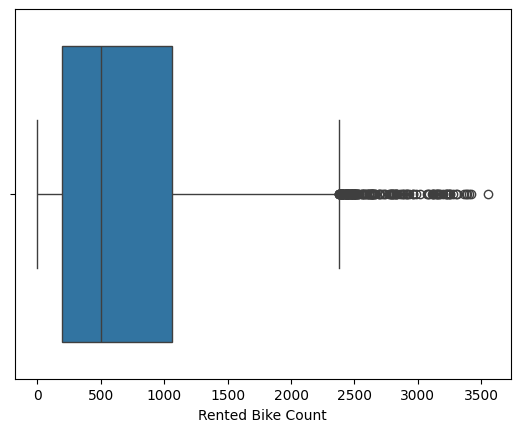

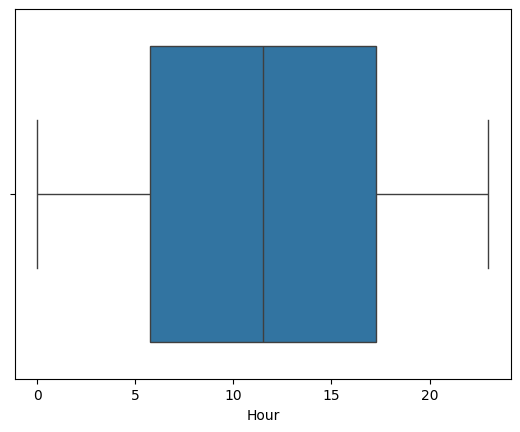

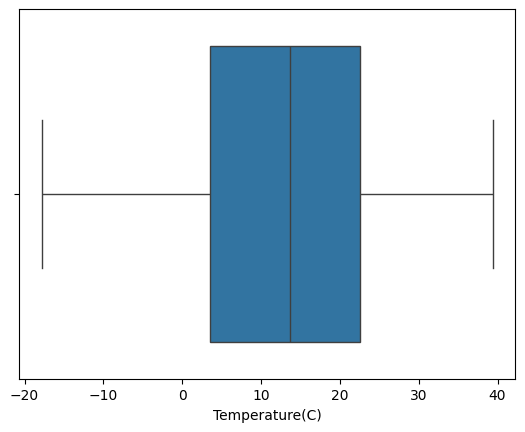

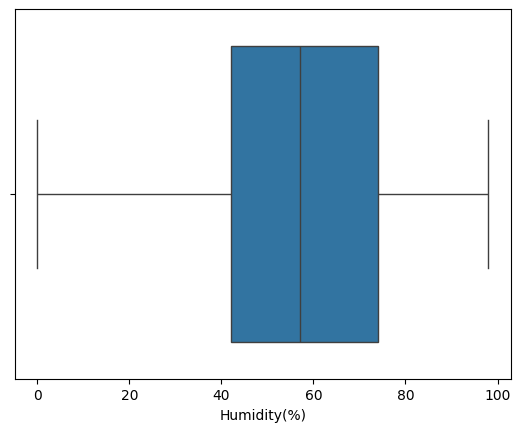

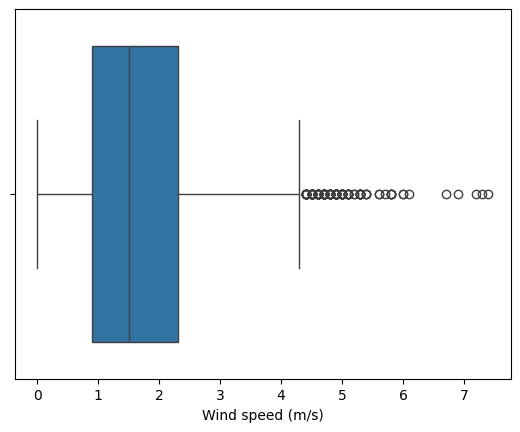

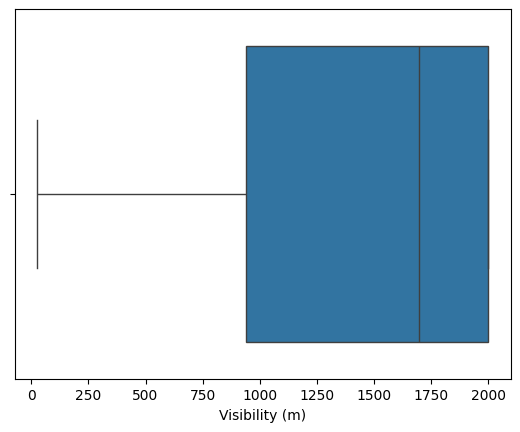

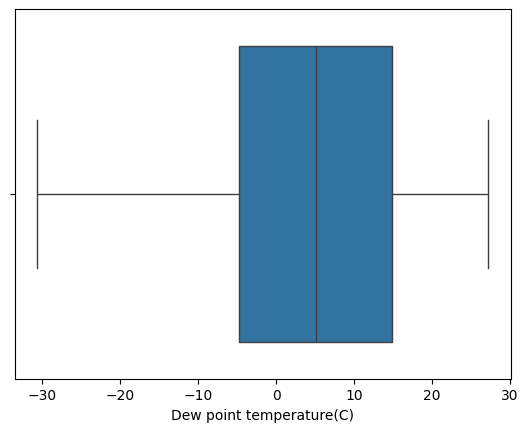

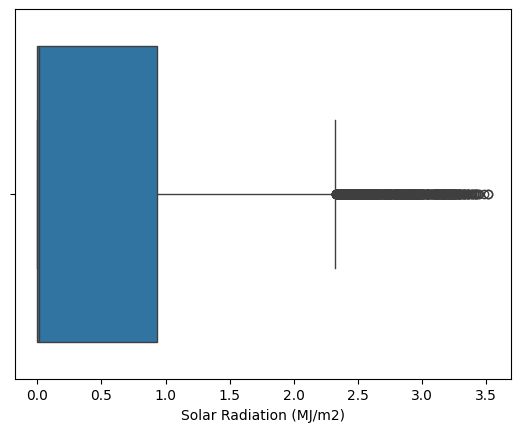

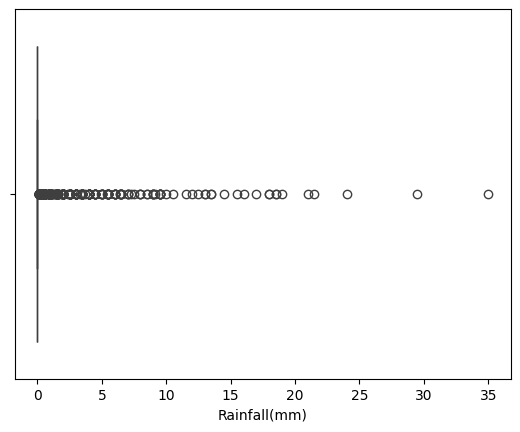

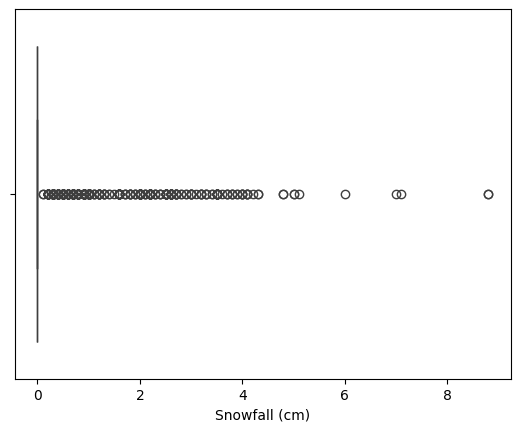

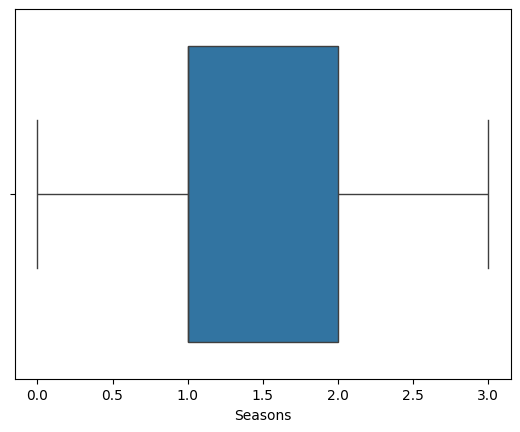

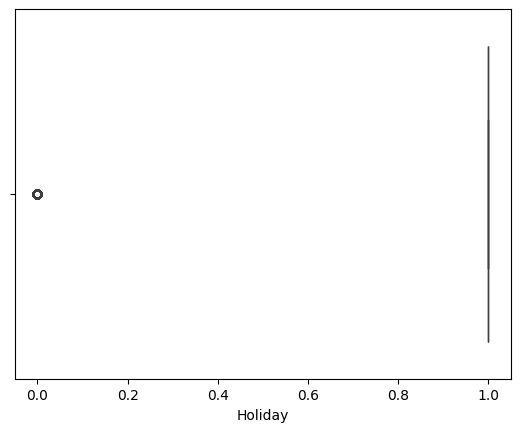

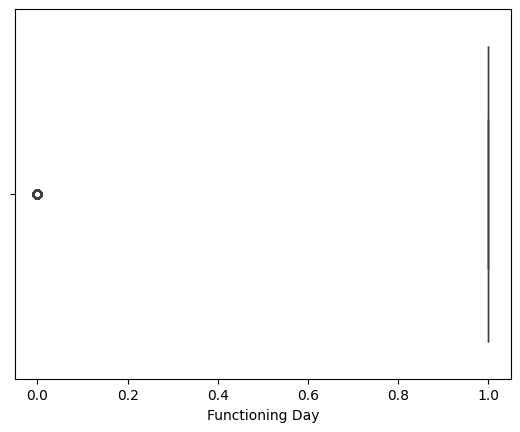

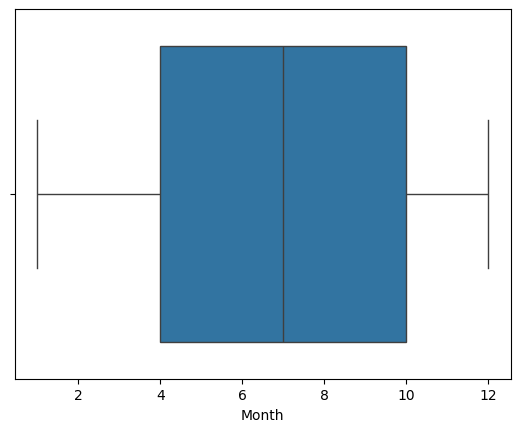

In [20]:
for col in bike_df.columns:
    plt.figure()
    sns.boxplot(x=bike_df[col])

In [15]:
print('Before outlier removal : ',bike_df.shape)
z = np.abs(zscore(bike_df, axis = 1))

Before outlier removal :  (8760, 14)


In [16]:
z1=pd.DataFrame(z,columns=bike_df.columns)
z1

Rented Bike Count      Hour  Temperature(C)  Humidity(%)  \
0              0.176438  0.318133        0.328258     0.246089   
1              0.086072  0.309557        0.322225     0.237447   
2              0.029758  0.303609        0.319205     0.231477   
3              0.089951  0.292657        0.310589     0.220541   
4              0.142028  0.286184        0.305665     0.223846   
...                 ...       ...             ...          ...   
8755           1.486659  0.361319        0.389114     0.333148   
8756           1.049367  0.340149        0.371151     0.308399   
8757           0.954899  0.332602        0.367803     0.298167   
8758           1.051743  0.334754        0.374742     0.296576   
8759           0.799429  0.319752        0.361846     0.279852   

      Wind speed (m/s)  Visibility (m)  Dew point temperature(C)  \
0             0.313849        3.576125                  0.352403   
1             0.309947        3.586322                  0.345807   
2             0.305558        3.591516                  0.342014   
3             0.296750        3.599693                  0.332809   
4             0.289496        3.602148                  0.330210   
...                ...             ...                       ...   
8755          0.392118        3.159981                  0.416345   
8756          0.373206        3.357756                  0.395991   
8757          0.372203        3.392159                  0.391716   
8758          0.376952        3.356544                  0.398654   
8759          0.363043        3.442770                  0.384189   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)   Seasons  \
0                    0.318133      0.318133       0.318133  0.312292   
1                    0.311506      0.311506       0.311506  0.305659   
2                    0.307508      0.307508       0.307508  0.301659   
3                    0.298505      0.298505       0.298505  0.292657   
4                    0.293977      0.293977       0.293977  0.288132   
...                       ...           ...            ...       ...   
8755                 0.397001      0.397001       0.397001  0.397001   
8756                 0.377501      0.377501       0.377501  0.377501   
8757                 0.372777      0.372777       0.372777  0.372777   
8758                 0.378962      0.378962       0.378962  0.378962   
8759                 0.365636      0.365636       0.365636  0.365636   

       Holiday  Functioning Day     Month  
0     0.316186         0.316186  0.294768  
1     0.309557         0.309557  0.288119  
2     0.305558         0.305558  0.284114  
3     0.296555         0.296555  0.275115  
4     0.292028         0.292028  0.270600  
...        ...              ...       ...  
8755  0.395123         0.395123  0.376343  
8756  0.375633         0.375633  0.356957  
8757  0.370864         0.370864  0.351733  
8758  0.376952         0.376952  0.356858  
8759  0.363641         0.363641  0.343691  

[8760 rows x 14 columns]

In [17]:
print('Before outlier removal : ',bike_df.shape)
z = np.abs(zscore(bike_df, axis = 1))
z1=pd.DataFrame(z,columns=bike_df.columns)

Before outlier removal :  (8760, 14)


In [ ]:

threshold = 3.598
dataset = bike_df[(z < threshold).all(axis=1)]
print('After Z-Score approach : ',dataset.shape)

After Z-Score approach :  (8072, 14)


In [19]:
dataset.skew()

Rented Bike Count            1.104234
Hour                        -0.081055
Temperature(C)              -0.173372
Humidity(%)                  0.013250
Wind speed (m/s)             0.908494
Visibility (m)              -0.602175
Dew point temperature(C)    -0.383300
Solar Radiation (MJ/m2)      1.441523
Rainfall(mm)                14.341934
Snowfall (cm)                8.468615
Seasons                      0.017028
Holiday                     -4.448751
Functioning Day            -10.925000
Month                       -0.015247
dtype: float64

In [20]:
dataset.kurt()

Rented Bike Count             0.751312
Hour                         -1.155974
Temperature(C)               -0.853968
Humidity(%)                  -0.818435
Wind speed (m/s)              0.801387
Visibility (m)               -1.104796
Dew point temperature(C)     -0.691132
Solar Radiation (MJ/m2)       0.929116
Rainfall(mm)                284.997203
Snowfall (cm)                92.936872
Seasons                      -1.288890
Holiday                      17.795795
Functioning Day             117.384716
Month                        -1.147744
dtype: float64

In [21]:
quantile_transformer = QuantileTransformer(output_distribution='normal')
dataset["Rainfall(mm)"]= quantile_transformer.fit_transform(dataset["Rainfall(mm)"].values.reshape(-1, 1)).flatten()

C:\Users\BAPS\AppData\Local\Temp\ipykernel_2984\2476069335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Rainfall(mm)"]= quantile_transformer.fit_transform(dataset["Rainfall(mm)"].values.reshape(-1, 1)).flatten()


In [22]:
dataset.skew()

Rented Bike Count            1.104234
Hour                        -0.081055
Temperature(C)              -0.173372
Humidity(%)                  0.013250
Wind speed (m/s)             0.908494
Visibility (m)              -0.602175
Dew point temperature(C)    -0.383300
Solar Radiation (MJ/m2)      1.441523
Rainfall(mm)                 3.715216
Snowfall (cm)                8.468615
Seasons                      0.017028
Holiday                     -4.448751
Functioning Day            -10.925000
Month                       -0.015247
dtype: float64

In [23]:
quantile_transformer = QuantileTransformer(output_distribution='normal')
dataset["Snowfall (cm)"]= quantile_transformer.fit_transform(dataset["Snowfall (cm)"].values.reshape(-1, 1)).flatten()

C:\Users\BAPS\AppData\Local\Temp\ipykernel_2984\1109835124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Snowfall (cm)"]= quantile_transformer.fit_transform(dataset["Snowfall (cm)"].values.reshape(-1, 1)).flatten()


In [24]:
dataset.kurt()

Rented Bike Count             0.751312
Hour                         -1.155974
Temperature(C)               -0.853968
Humidity(%)                  -0.818435
Wind speed (m/s)              0.801387
Visibility (m)               -1.104796
Dew point temperature(C)     -0.691132
Solar Radiation (MJ/m2)       0.929116
Rainfall(mm)                 11.875330
Snowfall (cm)                17.209167
Seasons                      -1.288890
Holiday                      17.795795
Functioning Day             117.384716
Month                        -1.147744
dtype: float64

In [25]:
dataset.skew()

Rented Bike Count            1.104234
Hour                        -0.081055
Temperature(C)              -0.173372
Humidity(%)                  0.013250
Wind speed (m/s)             0.908494
Visibility (m)              -0.602175
Dew point temperature(C)    -0.383300
Solar Radiation (MJ/m2)      1.441523
Rainfall(mm)                 3.715216
Snowfall (cm)                4.370483
Seasons                      0.017028
Holiday                     -4.448751
Functioning Day            -10.925000
Month                       -0.015247
dtype: float64

In [26]:
bike_df

Rented Bike Count  Hour  Temperature(C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0            -5.2           37               2.2   
1                   204     1            -5.5           38               0.8   
2                   173     2            -6.0           39               1.0   
3                   107     3            -6.2           40               0.9   
4                    78     4            -6.0           36               2.3   
...                 ...   ...             ...          ...               ...   
8755               1003    19             4.2           34               2.6   
8756                764    20             3.4           37               2.3   
8757                694    21             2.6           39               0.3   
8758                712    22             2.1           41               1.0   
8759                584    23             1.9           43               1.3   

      Visibility (m)  Dew point temperature(C)  Solar Radiation (MJ/m2)  \
0               2000                     -17.6                      0.0   
1               2000                     -17.6                      0.0   
2               2000                     -17.7                      0.0   
3               2000                     -17.6                      0.0   
4               2000                     -18.6                      0.0   
...              ...                       ...                      ...   
8755            1894                     -10.3                      0.0   
8756            2000                      -9.9                      0.0   
8757            1968                      -9.9                      0.0   
8758            1859                      -9.8                      0.0   
8759            1909                      -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  Functioning Day  Month  
0              0.0            0.0        3        1                1     12  
1              0.0            0.0        3        1                1     12  
2              0.0            0.0        3        1                1     12  
3              0.0            0.0        3        1                1     12  
4              0.0            0.0        3        1                1     12  
...            ...            ...      ...      ...              ...    ...  
8755           0.0            0.0        0        1                1     11  
8756           0.0            0.0        0        1                1     11  
8757           0.0            0.0        0        1                1     11  
8758           0.0            0.0        0        1                1     11  
8759           0.0            0.0        0        1                1     11  

[8760 rows x 14 columns]

In [27]:
from sklearn.preprocessing import StandardScaler
std_scalar=StandardScaler()
scaled_data=std_scalar.fit_transform(dataset)
scaled_df=pd.DataFrame(scaled_data,columns=dataset.columns)
scaled_df.head()

Rented Bike Count      Hour  Temperature(C)  Humidity(%)  Wind speed (m/s)  \
0          -0.790463 -1.724940       -1.644066    -1.056873          0.459981   
1          -0.868448 -1.579185       -1.670132    -1.008188         -0.891312   
2          -0.916799 -1.433430       -1.713574    -0.959502         -0.698270   
3          -0.904321 -0.850408       -1.765705    -1.154244         -0.408707   
4          -0.469166 -0.704653       -1.835213    -1.008188         -0.794791   

   Visibility (m)  Dew point temperature(C)  Solar Radiation (MJ/m2)  \
0        0.969635                 -1.785939                -0.676276   
1        0.969635                 -1.785939                -0.676276   
2        0.969635                 -1.793859                -0.676276   
3        0.969635                 -1.936424                -0.676276   
4        0.969635                 -1.920583                -0.676276   

   Rainfall(mm)  Snowfall (cm)   Seasons   Holiday  Functioning Day     Month  
0     -0.252987      -0.218814  1.402047  0.214482         0.090795  1.601695  
1     -0.252987      -0.218814  1.402047  0.214482         0.090795  1.601695  
2     -0.252987      -0.218814  1.402047  0.214482         0.090795  1.601695  
3     -0.252987      -0.218814  1.402047  0.214482         0.090795  1.601695  
4     -0.252987      -0.218814  1.402047  0.214482         0.090795  1.601695

In [28]:
scaled_df.skew()

Rented Bike Count            1.104234
Hour                        -0.081055
Temperature(C)              -0.173372
Humidity(%)                  0.013250
Wind speed (m/s)             0.908494
Visibility (m)              -0.602175
Dew point temperature(C)    -0.383300
Solar Radiation (MJ/m2)      1.441523
Rainfall(mm)                 3.715216
Snowfall (cm)                4.370483
Seasons                      0.017028
Holiday                     -4.448751
Functioning Day            -10.925000
Month                       -0.015247
dtype: float64

In [29]:
scaled_df.kurt()

Rented Bike Count             0.751312
Hour                         -1.155974
Temperature(C)               -0.853968
Humidity(%)                  -0.818435
Wind speed (m/s)              0.801387
Visibility (m)               -1.104796
Dew point temperature(C)     -0.691132
Solar Radiation (MJ/m2)       0.929116
Rainfall(mm)                 11.875330
Snowfall (cm)                17.209167
Seasons                      -1.288890
Holiday                      17.795795
Functioning Day             117.384716
Month                        -1.147744
dtype: float64

### Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
X=scaled_df.drop(["Rented Bike Count"],axis=1)
Y=scaled_df["Rented Bike Count"]

In [37]:
lr_model=LinearRegression()

In [35]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6457, 13)
(1615, 13)
(6457,)
(1615,)


In [37]:
from sklearn.metrics import r2_score

In [41]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [42]:
y_predict_lr_train=lr_model.predict(x_train)
y_predict_lr_test=lr_model.predict(x_test)

In [43]:
print(r2_score(y_train,y_predict_lr_train))
print("\n")
print(r2_score(y_test,y_predict_lr_test))

0.5468541601381862


0.5502347715379002


# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
y_predict_dt_train=dt_model.predict(x_train)
y_predict_dt_test=dt_model.predict(x_test)
print(r2_score(y_train, y_predict_dt_train))
print("\n")
print(r2_score(y_test, y_predict_dt_test))

1.0


0.7648910822647261


# Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
y_predict_rf_train = rf_model.predict(x_train)
y_predict_rf_test = rf_model.predict(x_test)
print(r2_score(y_train, y_predict_rf_train))
print("\n")
print(r2_score(y_test, y_predict_rf_test))

0.9813781886304715


0.8730088949223915


# Hyper-Parameter Tuning

## GridSearchCv - Linear Regression


#### Ridge

In [46]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
alpha_space=np.logspace(-5,8,2000)
para_grid={'alpha':alpha_space}

reg_cv=GridSearchCV(ridge,para_grid,cv=5)
reg_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-05, 1.01508697e-05, 1.03040155e-05, ...,
       9.70495435e+07, 9.85137267e+07, 1.00000000e+08], shape=(2000,))})

In [47]:
y_predict_train_cv=reg_cv.predict(x_train)
y_predict_test_cv=reg_cv.predict(x_test)

In [48]:
print(r2_score(y_train, y_predict_train_cv))
print("\n")
print(r2_score(y_test, y_predict_test_cv))

0.5468289955133323


0.5502229337879985


## RandomSearchCV - Linear Regression

In [49]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Model
ridge = Ridge()

# Define parameter space
param_dist = {'alpha': np.logspace(-5, 8, 2000)}

# Randomized search
ridge_random_search = RandomizedSearchCV(
    ridge,
    param_distributions=param_dist,
    n_iter=1000,         # Number of parameter settings sampled
    cv=109,              # 5-fold cross-validation
    scoring='r2',      # or 'neg_mean_squared_error' for regression
    random_state=42
)

# Fit the model
ridge_random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=109, estimator=Ridge(), n_iter=1000,
                   param_distributions={'alpha': array([1.00000000e-05, 1.01508697e-05, 1.03040155e-05, ...,
       9.70495435e+07, 9.85137267e+07, 1.00000000e+08], shape=(2000,))},
                   random_state=42, scoring='r2')

In [50]:
# for Ridge regression
y_predict_train_rrs = ridge_random_search.predict(x_train)
y_predict_test_rrs = ridge_random_search.predict(x_test)

print(r2_score(y_train, y_predict_train_rrs))
print("\n")
print(r2_score(y_test, y_predict_test_rrs))

0.5462106883266209


0.5494351941351036


#### Lasso

##### GridSearchCv

In [51]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso=Lasso()
alpha_space=np.logspace(-5,8,200)
para_grid={'alpha':alpha_space}

reg_cv=GridSearchCV(ridge,para_grid,cv=5)
reg_cv.fit(x_train,y_train)
y_predict_train_cv=reg_cv.predict(x_train)
y_predict_test_cv=reg_cv.predict(x_test)
print(r2_score(y_train, y_predict_train_cv))
print("\n")
print(r2_score(y_test, y_predict_test_cv))

0.5468264390796241


0.5502206060040452


##### RandomSearchCV

## GridSearchCV - Decision Tree

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define model
dt = DecisionTreeRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['squared_error', 'friedman_mse']
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Fit model
grid_search.fit(x_train, y_train)

# Best model
best_dt = grid_search.best_estimator_

# Predict
y_predict_train = best_dt.predict(x_train)
y_predict_test = best_dt.predict(x_test)

# Scores
from sklearn.metrics import r2_score
print("Train R2:", r2_score(y_train, y_predict_train))
print("Test R2 :", r2_score(y_test, y_predict_test))
print("Best Parameters:", grid_search.best_params_)

Train R2: 0.8847214755825101
Test R2 : 0.8152654823092113
Best Parameters: {'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 20}


In [53]:
max_depth_array=[]
min_samples_leaf_array=[]
min_samples_split_array=[]

In [54]:
for i in range(np.random.randint(1,5)):
    max_depth_array.append(np.random.randint(1,10))

In [55]:
for i in range(np.random.randint(1,5)):
    min_samples_split_array.append(np.random.randint(2,10))

In [56]:
for i in range(np.random.randint(1,5)):
    min_samples_leaf_array.append(np.random.randint(6,9))

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define model
dt = DecisionTreeRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'max_depth': max_depth_array,
    'min_samples_split':min_samples_split_array ,
    'min_samples_leaf': min_samples_leaf_array ,
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['squared_error', 'friedman_mse']  
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Fit model
grid_search.fit(x_train, y_train)

# Best model
best_dt = grid_search.best_estimator_

# Predict
y_predict_train = best_dt.predict(x_train)
y_predict_test = best_dt.predict(x_test)

# Scores
from sklearn.metrics import r2_score
print("Train R2:", r2_score(y_train, y_predict_train))
print("Test R2 :", r2_score(y_test, y_predict_test))
print("Best Parameters:", grid_search.best_params_)

Train R2: 0.6746867295269487
Test R2 : 0.6853479935257165
Best Parameters: {'criterion': 'squared_error', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 6}


## RandomSearchCV - DecisionTree

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
import numpy as np

# Define model
dt = DecisionTreeRegressor(random_state=42)

# Define hyperparameter distributions
param_dist = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['squared_error', 'friedman_mse']
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=30,           # Try 30 random combinations
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

# Fit model
random_search.fit(x_train, y_train)

# Best model
best_dt_random = random_search.best_estimator_

# Predict
y_predict_train = best_dt_random.predict(x_train)
y_predict_test = best_dt_random.predict(x_test)

# Scores
print("Train R2:", r2_score(y_train, y_predict_train))
print("Test R2 :", r2_score(y_test, y_predict_test))
print("Best Parameters:", random_search.best_params_)


Train R2: 0.8911301493892484
Test R2 : 0.8176895923918829
Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 10, 'criterion': 'friedman_mse'}


In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
import numpy as np

# Define model
dt = DecisionTreeRegressor(random_state=42)

# Define hyperparameter distributions
param_dist = {
    'max_depth': max_depth_array,
    'min_samples_split': min_samples_split_array,
    'min_samples_leaf': min_samples_leaf_array,
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['squared_error', 'friedman_mse']
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=30,           # Try 30 random combinations
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

# Fit model
random_search.fit(x_train, y_train)

# Best model
best_dt_random = random_search.best_estimator_

# Predict
y_predict_train = best_dt_random.predict(x_train)
y_predict_test = best_dt_random.predict(x_test)

# Scores
print("Train R2:", r2_score(y_train, y_predict_train))
print("Test R2 :", r2_score(y_test, y_predict_test))
print("Best Parameters:", random_search.best_params_)

c:\Users\BAPS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 24 is smaller than n_iter=30. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Train R2: 0.6746867295269487
Test R2 : 0.6853479935257165
Best Parameters: {'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': None, 'max_depth': 4, 'criterion': 'squared_error'}


### GridSearchCV - Random Forest

In [60]:
rf=RandomForestRegressor(random_state=42)

In [61]:
param_grid = {
    'n_estimators': [3,12,5,1],
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['squared_error', 'friedman_mse']
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Fit model
grid_search.fit(x_train, y_train)

# Best model
best_dt = grid_search.best_estimator_

# Predict
y_predict_train = best_dt.predict(x_train)
y_predict_test = best_dt.predict(x_test)

# Scores
from sklearn.metrics import r2_score
print("Train R2:", r2_score(y_train, y_predict_train))
print("Test R2 :", r2_score(y_test, y_predict_test))
print("Best Parameters:", grid_search.best_params_)

Train R2: 0.9497542067950904
Test R2 : 0.8634225921408997
Best Parameters: {'criterion': 'squared_error', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 12}


### RandomSearchCV

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
import numpy as np

# Define model
dt = RandomForestRegressor(random_state=42)

# Define hyperparameter distributions
param_dist = {
    'n_estimators':[3,12,5,1],
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['squared_error', 'friedman_mse']
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,           # Try 30 random combinations
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

# Fit model
random_search.fit(x_train, y_train)

# Best model
best_dt_random = random_search.best_estimator_

# Predict
y_predict_train = best_dt_random.predict(x_train)
y_predict_test = best_dt_random.predict(x_test)

# Scores
print("Train R2:", r2_score(y_train, y_predict_train))
print("Test R2 :", r2_score(y_test, y_predict_test))
print("Best Parameters:", random_search.best_params_)

Train R2: 0.9310128827828614
Test R2 : 0.8671952108775225
Best Parameters: {'n_estimators': 12, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 20, 'criterion': 'squared_error'}


### Boosting Algorithms

##### Gradient Boosting
- high learning rate can make model overfit,giving [0] will make model return in negative ,while 1 will make it very overfit
- max_depth,n_estimators,max_features increase the model accuracy,but increasing their value too much can also result in overfitting

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

In [66]:
gbr = GradientBoostingRegressor(loss="absolute_error", # {'absolute_error', 'quantile', 'squared_error', 'huber'}
                                learning_rate=0.01,
                                n_estimators=600,
                                max_depth = 10, 
                                max_features = 5)

In [67]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, loss='absolute_error',
                          max_depth=10, max_features=5, n_estimators=600)

In [68]:
y_predict_train = gbr.predict(x_train)
y_predict_test = gbr.predict(x_test)

In [69]:
print("Train R2:", r2_score(y_train, y_predict_train))
print("Test R2 :", r2_score(y_test, y_predict_test))

Train R2: 0.9218097195160484
Test R2 : 0.8685890678560471


### XGBoost

In [70]:
import xgboost as xgb

In [71]:
xg=xgb.XGBRegressor(learning_rate=2,
                    n_estimators=10,
                    max_depth = 15,
                    # min_split_loss=0,       
                    # subsample=0.9,
                    # colsample_bytree=0.7,
                    )

In [72]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10,
             n_jobs=None, num_parallel_tree=None, ...)

In [73]:
y_predict_train = gbr.predict(x_train)
y_predict_test = gbr.predict(x_test)
print("Train R2:", r2_score(y_train, y_predict_train))
print("Test R2 :", r2_score(y_test, y_predict_test))

Train R2: 0.9218097195160484
Test R2 : 0.8685890678560471


##### Graph of Linear Regression

Text(0, 0.5, 'Predicted')

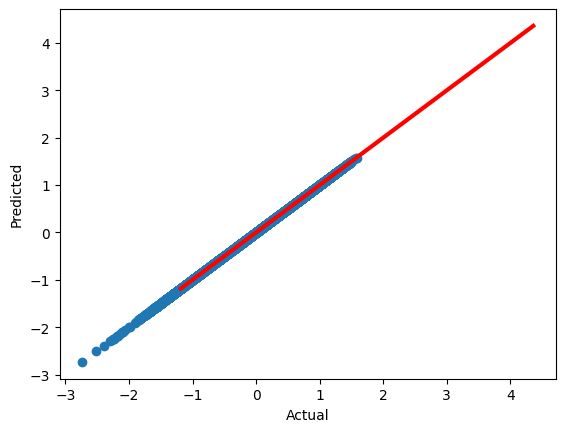

In [74]:
    # lin.predict()
    y_predict_lr_train = lr_model.predict(x_train)
    y_predict_lr_test = lr_model.predict(x_test)
    plt.scatter(y_predict_lr_train,y_predict_lr_train)
    plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],c='red',lw=3)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

##### Graph of decision tree

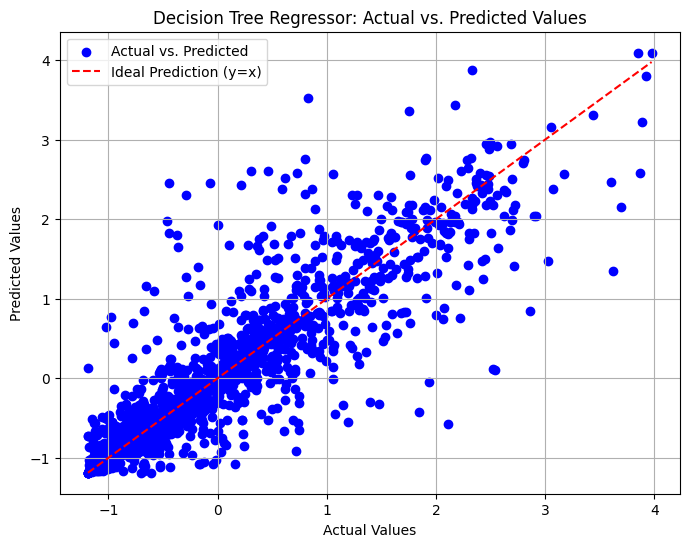

In [75]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict_dt_test, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction (y=x)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regressor: Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

### Light LGB

In [76]:
import lightgbm as lgb

In [77]:
lgb=lgb.LGBMRegressor(learning_rate=2,
                    n_estimators=10,
                    max_depth = 15,
                    # min_split_loss=0,       
                    subsample=0.9,
                    colsample_bytree=0.7,
                    )

In [78]:
lgb.fit(x_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1273
[LightGBM] [Info] Number of data points in the train set: 6457, number of used features: 13
[LightGBM] [Info] Start training from score -0.005133


LGBMRegressor(colsample_bytree=0.7, learning_rate=2, max_depth=15,
              n_estimators=10, subsample=0.9)

In [79]:
y_predict_train = gbr.predict(x_train)
y_predict_test = gbr.predict(x_test)
print("Train R2:", r2_score(y_train, y_predict_train))
print("Test R2 :", r2_score(y_test, y_predict_test))

Train R2: 0.9218097195160484
Test R2 : 0.8685890678560471


In [80]:
from catboost import CatBoostRegressor

In [81]:
ctb=CatBoostRegressor(loss_function='RMSE')
ctb.fit(x_train,y_train)

Learning rate set to 0.054975
0:	learn: 0.9634152	total: 172ms	remaining: 2m 51s
1:	learn: 0.9329715	total: 181ms	remaining: 1m 30s
2:	learn: 0.9012881	total: 194ms	remaining: 1m 4s
3:	learn: 0.8718083	total: 213ms	remaining: 53s
4:	learn: 0.8468706	total: 233ms	remaining: 46.3s
5:	learn: 0.8220491	total: 241ms	remaining: 39.9s
6:	learn: 0.7979588	total: 246ms	remaining: 34.9s
7:	learn: 0.7765472	total: 250ms	remaining: 31s
8:	learn: 0.7553321	total: 255ms	remaining: 28s
9:	learn: 0.7369304	total: 258ms	remaining: 25.5s
10:	learn: 0.7187035	total: 261ms	remaining: 23.5s
11:	learn: 0.7008428	total: 263ms	remaining: 21.7s
12:	learn: 0.6837753	total: 267ms	remaining: 20.3s
13:	learn: 0.6693066	total: 270ms	remaining: 19s
14:	learn: 0.6549452	total: 272ms	remaining: 17.9s
15:	learn: 0.6418934	total: 274ms	remaining: 16.9s
16:	learn: 0.6284494	total: 276ms	remaining: 16s
17:	learn: 0.6173757	total: 279ms	remaining: 15.2s
18:	learn: 0.6066509	total: 281ms	remaining: 14.5s
19:	learn: 0.597313

In [82]:
y_predict_train = ctb.predict(x_train)
y_predict_test = ctb.predict(x_test)
print("Train R2:", r2_score(y_train, y_predict_train))
print("Test R2 :", r2_score(y_test, y_predict_test))

Train R2: 0.9430611244503422
Test R2 : 0.8866869881350702


#### Ada Boost

In [83]:
from sklearn.ensemble import AdaBoostRegressor

In [84]:
dtr = DecisionTreeRegressor(max_depth=3)

In [85]:
abr = AdaBoostRegressor(n_estimators=50, learning_rate=0.1, loss="square", random_state=42)

In [86]:
abr.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.1, loss='square', random_state=42)

In [87]:
y_predict_train = abr.predict(x_train)
y_predict_test = abr.predict(x_test)
print("Train R2:", r2_score(y_train, y_predict_train))
print("Test R2 :", r2_score(y_test, y_predict_test))

Train R2: 0.7039214905081388
Test R2 : 0.7081913909488482


#### Support Vector Regression

In [88]:
from sklearn.svm import SVR

In [108]:
svr = SVR(kernel="rbf") #kernels=["linear","poly","rbf","sigmoid","precomputed -> the matrix should be a square matrix"]
svr.fit(x_train,y_train)

SVR()

In [109]:
y_predict_train = svr.predict(x_train)
y_predict_test = svr.predict(x_test)
print("Train R2:", r2_score(y_train, y_predict_train))
print("Test R2 :", r2_score(y_test, y_predict_test))

Train R2: 0.7755120852231898
Test R2 : 0.7676702512596494


#### Bayesian Ridge

In [91]:
from sklearn.linear_model import BayesianRidge

In [92]:
bayesian_model=BayesianRidge(max_iter=500,tol=10, alpha_init=0.5, lambda_init=1.0)

In [93]:
bayesian_model.fit(x_train,y_train)

BayesianRidge(alpha_init=0.5, lambda_init=1.0, max_iter=500, tol=10)

In [94]:
y_predict_train = bayesian_model.predict(x_train)
y_predict_test = bayesian_model.predict(x_test)
print("Train R2:", r2_score(y_train, y_predict_train))
print("Test R2 :", r2_score(y_test, y_predict_test))

Train R2: 0.5468213893334026
Test R2 : 0.5502158527705869


### K-NN Regression

In [95]:
from sklearn.neighbors import KNeighborsRegressor

In [96]:
knn_regressor = KNeighborsRegressor(n_neighbors=4,weights='uniform',algorithm="ball_tree",leaf_size=500,p=1)
knn_regressor.fit(x_train, y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=500, n_neighbors=4, p=1)

In [97]:
y_predict_train = knn_regressor.predict(x_train)
y_predict_test = knn_regressor.predict(x_test)
print("Train R2:", r2_score(y_train, y_predict_train))
print("Test R2 :", r2_score(y_test, y_predict_test))

Train R2: 0.889780378392991
Test R2 : 0.8034479497887231


### HyperParameter Tuning on Boosting algorithms


#### Gradient Boosting -> GridSearchCV

In [98]:
from sklearn.model_selection import RepeatedKFold

In [99]:
gbr= GradientBoostingRegressor()

In [110]:
grid = {
    'n_estimators' : [1,5,10,15,20],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0],
    'subsample' : [0.5, 0.7, 1.0],
    'max_depth' : [3, 7, 9,12]
}

In [111]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=gbr, param_grid=grid, n_jobs=-1, cv=cv)

In [112]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'max_depth': [3, 7, 9, 12],
                         'n_estimators': [1, 5, 10, 15, 20],
                         'subsample': [0.5, 0.7, 1.0]})

In [113]:
best_dt_gbr = grid_search.best_estimator_

# Predict
y_predict_train = best_dt_gbr.predict(x_train)
y_predict_test = best_dt_gbr.predict(x_test)

# Scores
from sklearn.metrics import r2_score
print("Train R2:", r2_score(y_train, y_predict_train))
print("Test R2 :", r2_score(y_test, y_predict_test))
print("Best Parameters:", grid_search.best_params_)

Train R2: 0.9605429790596864
Test R2 : 0.854962805822748
Best Parameters: {'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 20, 'subsample': 0.7}


#### GradientBossting -> RandomizedSearchCV

In [30]:
# grid_search = RandomizedSearchCV(estimator=gbr, param_grid=grid, n_jobs=-1, cv=cv)

### Combining multiple models together

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)

rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)

gb = GradientBoostingRegressor(random_state=42)
gb.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [39]:
dt_pred = dt.predict(x_test)
rf_pred = rf.predict(x_test)
gb_pred = gb.predict(x_test)

In [40]:
print(dt_pred,"\n",rf_pred,"\n",gb_pred)

[-0.99478349  2.51764928 -0.88872424 ... -0.7514711  -0.76394866
 -0.74211293] 
 [-0.93064884  1.69712502 -0.56330951 ... -0.74669843 -0.77081131
 -0.7346108 ] 
 [-0.94696789  1.16302091 -0.73766331 ... -0.81856128 -0.68180557
 -0.75891223]


In [ ]:
# from sklearn.linear_model import LinearRegression
import xgboost as xgb
# Combine the predictions of the base models into a single feature matrix
X_val_meta = np.column_stack((dt_pred, rf_pred, gb_pred))

# Train the meta-model on the combined feature matrix and the target values
meta_model = xgb.XGBRegressor()
meta_model.fit(X_val_meta, y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [52]:
X_new_meta = np.column_stack((dt_pred, rf_pred, gb_pred))

# Make a prediction using the meta-model
y_new_pred = meta_model.predict(X_new_meta)

In [53]:
y_predict_meta_test=meta_model.predict(X_new_meta)
print("Test R2 :", r2_score(y_test, y_predict_meta_test))

Test R2 : 0.9914351261240091
